# Notebook to show Anomalies (Trip Duration & Speed)

In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

plt.style.use('seaborn')

# magic function for plots
%matplotlib inline 

train = pd.read_csv('train_2015.csv') 

pd.set_option('display.float_format', lambda x: '%.3f' % x) # setting display decimals for float data
pd.set_option('display.max_columns', 50) # displaying max 30 columns

In [200]:
train.shape

(2936867, 19)

In [201]:
train.head(5)

,RateCodeID,VendorID,dropoff_latitude,dropoff_longitude,extra,fare_amount,improvement_surcharge,mta_tax,passenger_count,payment_type,pickup_latitude,pickup_longitude,store_and_fwd_flag,tip_amount,tolls_amount,total_amount,tpep_dropoff_datetime,tpep_pickup_datetime,trip_distance
0,1.000,2,40.756,-73.992,0.000,12.500,0.300,0.500,1,2,40.739,-73.977,N,0.000,0.000,13.300,2015-01-30 08:47:45,2015-01-30 08:29:43,1.840
1,1.000,1,40.757,-73.970,1.000,14.500,0.300,0.500,1,2,40.781,-73.984,N,0.000,0.000,16.300,2015-01-20 16:22:23,2015-01-20 16:00:48,2.400
2,1.000,1,40.773,-73.965,0.500,4.000,0.300,0.500,1,2,40.770,-73.958,N,0.000,0.000,5.300,2015-01-10 20:04:19,2015-01-10 20:01:33,0.500
3,1.000,1,40.837,-73.943,0.500,24.500,0.300,0.500,3,1,40.739,-74.000,N,5.200,0.000,31.000,2015-01-08 02:22:38,2015-01-08 02:01:12,8.000
4,1.000,1,40.741,-73.993,0.000,7.500,0.300,0.500,1,1,40.744,-73.977,N,1.650,0.000,9.950,2015-01-31 12:26:52,2015-01-31 12:18:10,1.200


In [202]:
train.describe()

,RateCodeID,VendorID,dropoff_latitude,dropoff_longitude,extra,fare_amount,improvement_surcharge,mta_tax,passenger_count,payment_type,pickup_latitude,pickup_longitude,tip_amount,tolls_amount,total_amount,trip_distance
count,2936867.000,2936867.000,2936867.000,2936867.000,2936867.000,2936867.000,2936867.000,2936867.000,2936867.000,2936867.000,2936867.000,2936867.000,2936867.000,2936867.000,2936867.000,2936867.000
mean,1.042,1.525,40.133,-72.851,0.314,12.918,0.298,0.498,1.682,1.379,40.110,-72.810,1.703,0.309,16.041,6.871
std,0.656,0.499,4.987,9.046,0.365,11.072,0.023,0.038,1.335,0.499,5.071,9.206,2.553,1.691,13.506,27020.114
min,1.000,1.000,0.000,-171.797,-45.660,-170.000,-0.300,-1.700,0.000,1.000,0.000,-171.797,-19.080,-15.000,-170.800,-40840124.400
25%,1.000,1.000,40.734,-73.991,0.000,6.500,0.300,0.500,1.000,1.000,40.736,-73.992,0.000,0.000,8.750,1.000
50%,1.000,2.000,40.753,-73.980,0.000,9.500,0.300,0.500,1.000,1.000,40.753,-73.982,1.160,0.000,11.800,1.710
75%,1.000,2.000,40.769,-73.962,0.500,15.000,0.300,0.500,2.000,2.000,40.768,-73.967,2.300,0.000,17.800,3.200
max,99.000,2.000,404.367,0.000,52.000,999.990,1.040,11.110,9.000,4.000,69.703,18.592,552.270,905.500,1000.290,11800005.200


In [203]:
train.isnull().sum()

RateCodeID               0
VendorID                 0
dropoff_latitude         0
dropoff_longitude        0
extra                    0
fare_amount              0
improvement_surcharge    0
mta_tax                  0
passenger_count          0
payment_type             0
pickup_latitude          0
pickup_longitude         0
store_and_fwd_flag       0
tip_amount               0
tolls_amount             0
total_amount             0
tpep_dropoff_datetime    0
tpep_pickup_datetime     0
trip_distance            0
dtype: int64

# Creating features: trip duration and speed

In [204]:
train['tpep_pickup_datetime'] = pd.to_datetime(train['tpep_pickup_datetime'])
train['tpep_dropoff_datetime'] = pd.to_datetime(train['tpep_dropoff_datetime'])
train['trip_duration'] = train['tpep_dropoff_datetime'] - train['tpep_pickup_datetime']
train['trip_duration'] = train['trip_duration'].dt.total_seconds()
train['duration [min]'] = train['trip_duration'] / 60.0
train['duration [hr]'] = train['duration [min]'] / 60.0
train['speed_taximeter [miles/hr]'] = train['trip_distance'] / (train['duration [min]'] / 60.0)
train['speed_taximeter [km/hr]'] = train['trip_distance'] * 1.609344 / (train['duration [min]'] / 60.0)

In [205]:
print(np.percentile(train['trip_duration'],1))
print(np.percentile(train['trip_duration'],99))
print(np.percentile(train['trip_distance'],1))
print(np.percentile(train['trip_distance'],99))

73.0
3414.0
0.2
18.6


# Check count of trip duration over 3 hours

In [216]:
train[train['duration [hr]']>=3].shape[0]

3238

In [207]:
train[['duration [min]','duration [hr]']][train['duration [hr]']>=24].sort_values("duration [hr]", ascending=False)

,duration [min],duration [hr]
1035247,125373160.833,2089552.681
61335,547190.333,9119.839
814461,329242.533,5487.376
1780439,217134.467,3618.908
64901,84929.867,1415.498
587931,50512.017,841.867
368774,44898.950,748.316
415981,44520.117,742.002
285689,44359.767,739.329
340263,13507.450,225.124


# Creating a list with count for different trip duration in hours

In [208]:
list = []
for x in range(0,25):
    if x <= 23:
        list.append(train['duration [hr]'][train['duration [hr]']>x][train['duration [hr]']<=(x+1)].count())
    else:
        list.append(train['duration [hr]'][train['duration [hr]']>x].count())

In [209]:
for x in range(0,25):
    print(x, list[x])

0 2909311
1 20348
2 304
3 99
4 31
5 38
6 42
7 38
8 32
9 31
10 34
11 28
12 26
13 26
14 24
15 36
16 47
17 46
18 20
19 13
20 13
21 24
22 80
23 2498
24 12


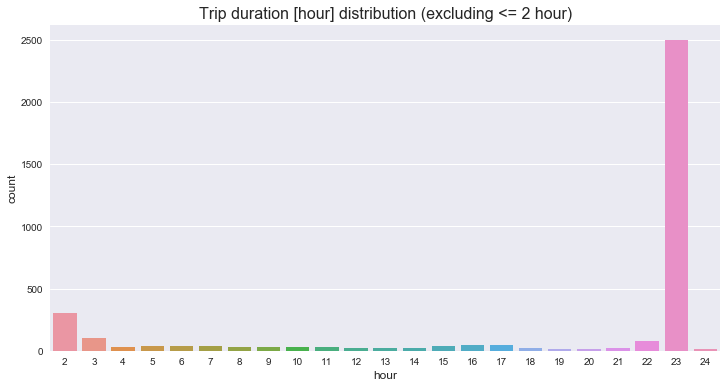

In [210]:
label = np.arange(0,25)

#clrs = ['red' if (i == 0) else ('grey' if (i <= 21) else 'red') for i in label]

plt.subplots(figsize = (12,6))
plt.grid('on')
sns.barplot(x=label[2:],y=list[2:])
plt.title("Trip duration [hour] distribution (excluding <= 2 hour)", fontsize=16)
plt.ylabel('count', fontsize=12)
plt.xlabel('hour', fontsize=12)
plt.show()

In [211]:
train = train.replace([np.inf, -np.inf], np.nan) # replace infinity wth nan
train = train.dropna(axis=0).reset_index(drop=True)

# Creating a list with count of speed in km/hour (10 km/hr increment)

In [212]:
list2 = []
for x in range(0,110,10):
    if x <= 90:
        list2.append(train['speed_taximeter [km/hr]'][train['speed_taximeter [km/hr]']>x]
                 [train['speed_taximeter [km/hr]']<=(x+10)].count())
    else:
        list2.append(train['speed_taximeter [km/hr]'][train['speed_taximeter [km/hr]']>x].count())

In [213]:
list2

[387228, 1476727, 700248, 214041, 84976, 35166, 13276, 3223, 488, 118, 2446]

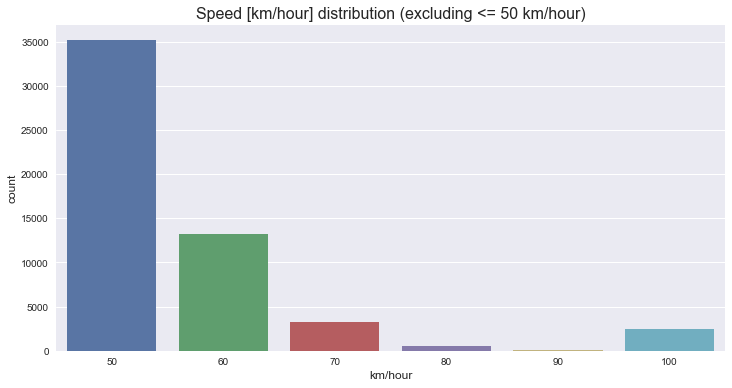

In [214]:
label = np.arange(0,110,10)

#clrs = ['red' if (i == 0) else ('grey' if (i <= 21) else 'red') for i in label]

plt.subplots(figsize = (12,6))
plt.grid('on')
sns.barplot(x=label[5:],y=list2[5:])
plt.title("Speed [km/hour] distribution (excluding <= 50 km/hour)", fontsize=16)
plt.ylabel('count', fontsize=12)
plt.xlabel('km/hour', fontsize=12)
plt.show()

In [215]:
train[['speed_taximeter [miles/hr]','speed_taximeter [km/hr]']][train['speed_taximeter [km/hr]']>100].sort_values("speed_taximeter [km/hr]", ascending=False).head(10)

,speed_taximeter [miles/hr],speed_taximeter [km/hr]
2534666,30106310.645,48451410.399
598919,20571432.735,33106511.843
521346,19772020.725,31819982.922
807761,14703778.329,23663437.432
1161309,14463744.883,23277141.044
1389415,13018437.500,20951144.280
811969,3645772.048,5867301.371
2287812,3096130.909,4982739.702
1022265,462962.963,745066.667
1525415,95760.000,154110.781
